#### In machine learning, a category in a classification problem is called a class. Data points are called samples. The class associated with a specific sample is called a label.

<h1 style="color: red;">Workflow of neural networks</h1>

<p>Here's the workflow in simple terms:</p>

<ol>
    <li>First, we give our neural network a bunch of pictures and tell it what each picture is (e.g., "this is a cat," "this is a dog"). This is called **training data**.[we’ll feed the neural network the training data, train_images and train_labels.]</li>
    <li>The network then **learns** to recognize patterns that link the pictures to their correct labels. [The network will then learn to associate images and labels]</li>
    <li>Once it's learned, we give the network a new set of pictures it has never seen before (**test images**), and ask it to guess what they are. [Finally, we’ll ask the network to produce predictions for test_images, and we’ll
 verify whether these predictions match the labels from test_labels]</li>
    <li>Finally, we **check its guesses** against the actual labels for those test pictures to see how well it did.</li>
</ol> 

### Layers

1. The core building block of neural networks is the layer.
2. Think of a neural network layer like a `specialized filter for information`. You put some raw data in, and it comes out in a more refined and useful form. The main idea behind deep learning is to chain these simple filters together.
3. Layers extract representations out of the data fed into them.

### Model compile

To get our model ready for training, we need to set up three key things:

1. `Optimizer`: This is like the model's "guide." It's the method that tells the model how to adjust its "weights" based on the training data, so it gets better at its job.
2. `Loss Function`: This is the model's "report card." It's how the model measures how well (or how poorly) it's performing on the training data. A lower score means it's doing better, and this score helps the optimizer know which way to "steer" the model.
3. `Metrics`: These are simply what we'll watch to see the model's progress. For now, we only care about accuracy, which tells us the percentage of images the model classifies correctly.
<code>
 model.compile(optimizer="rmsprop",
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"])
</code>

### Model fit 

1. To train the model, we call keras's  `fit()` method — we fit the model to its training data.
<code>
 model.fit(train_images, train_labels, epochs=5, batch_size=128)
</code>
2. Two quantities are displayed during training: the `loss` of the model over the training data, and the `accuracy` of the model over the training data.

### Predict

1. After we have a trained model, we can use it to predict class probabilities for new digits—images that weren’t part of the training data, like those from the test set.
<code>
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
print(predictions[0]) => array([1.0726176e-10, 1.6918376e-10, 6.1314843e-08, 8.4106023e-06, 2.9967067e-11, 3.0331331e-09, 8.3651971e-14, 9.9999106e-01, 2.6657624e-08, 3.8127661e-07], dtype=float32)
</code>
2. Each number of index i in that array corresponds to the probability that digit image test_digits[0] belongs to class i. This first test digit has the highest probability score (0.99999106, almost 1) at index 7, so according to our model, it must be a 7

### Evaluate

1. Evaluate is used to compute average accuracy over the entire test set.
<code>
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}") => test_acc: 0.9785
</code>

<h1 style="color: red;">Data representations for neural networks</h1>

1. `Scalars (rank-0 tensors)`: A tensor that contains only one number is called a scalar. A scalar tensor has 0 axes (ndim == 0).
2. `Vectors (rank-1 tensors)`: An array of numbers is called a vector, or rank-1 tensor. Has one axis.
<code>
x = np.array([12, 3, 6, 14, 7])
</code>
3. `Matrices (rank-2 tensors)`: An array of vectors is a matrix, or rank-2 tensor.  A matrix has two axes
 (often referred to as rows and columns).
<code>
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
</code>

4. `Rank-3 and higher-rank tensors`: A tensor with rank 3 is often referred to as a 3D tensor. It can be visualized as a cube or a stack of matrices.

<code>
tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)
</code>

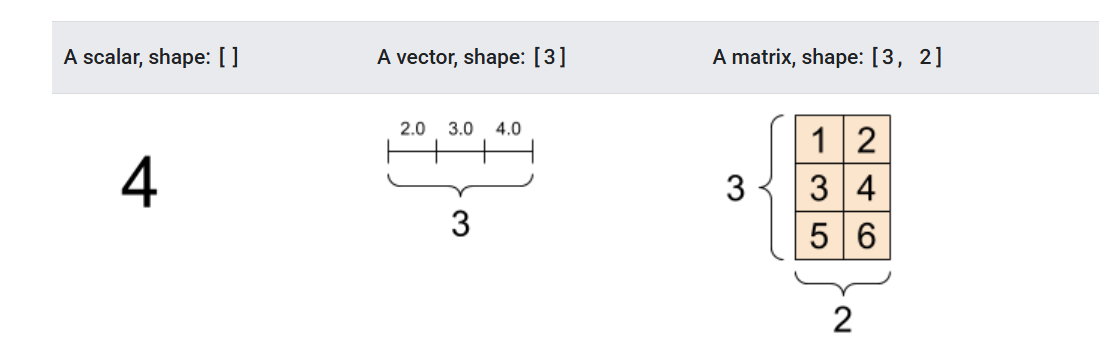

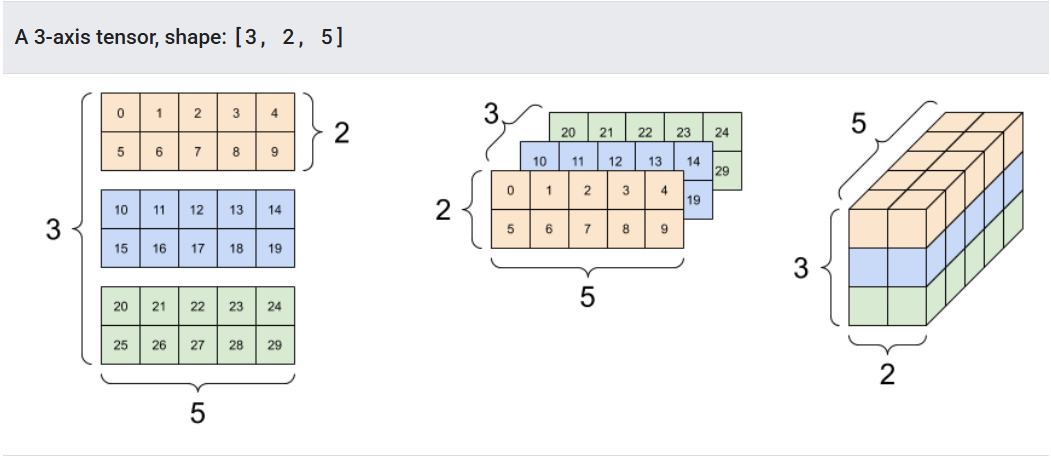

### Tensor attributes

1. `Number of axes (rank)`—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as NumPy or TensorFlow.
2. `Shape`—This is a tuple of integers that describes how many dimensions the ten sor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().
3. `Data type (dtype)`—This specifies the type of data stored in the tensor, such as float32 (for decimal numbers), uint8

### The notion of data batches 

While axes are often referred to by their indices, you should always keep track of the meaning of each. Often axes are ordered from global to local: The batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.

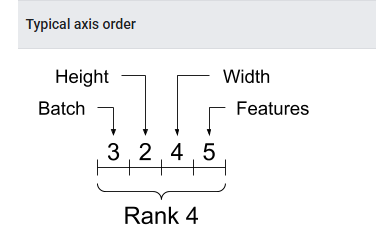

### Geometric interpretation of tensor operations

1. `Translation`: Translation simply means moving that object from one place to another without turning it or changing its size. Tensor addition thus represents the action of translating an object.
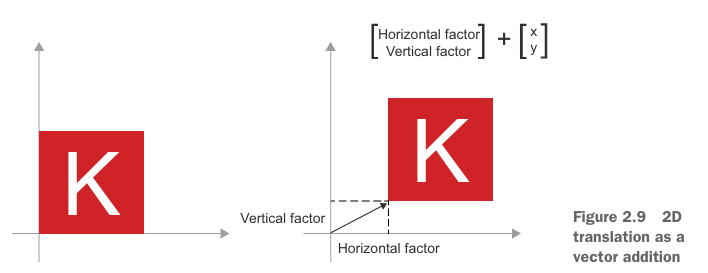

2. `Rotation`: A anticlockwise rotation of a 2D vector by an angle theta can be achieved via a dot product with a 2x2 matrix <code>R = [[cos(theta),-sin(theta)], [sin(theta), cos(theta)]].</code>
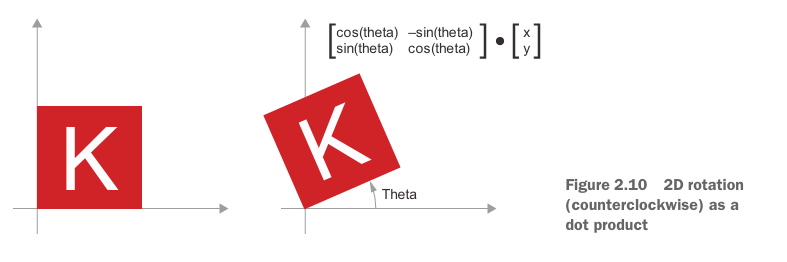

3. `Scaling`: A vertical and horizontal scaling of the image can be achieved via a dot product with a 2x2 matrix
<code>S = [[horizontal_factor, 0], [0, vertical_factor]]</code>
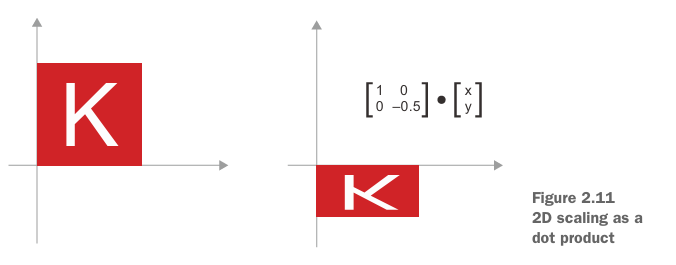

4. `Linear transform`: A dot product with an arbitrary matrix implements a linear transform. Note that scaling and rotation, listed previously, are by definition linear transforms.

5. `Affine transform`: An affine transform is the combination of a linear transform (achieved via a dot product with some matrix) and a translation (achieved via a vector addition).
<code>y = W • x + b</code>
    1. `W • x`: This part is exactly the linear transform (scaling, rotation). W is the matrix, and x is your input data.
    2. `+ b`: This part is the translation (the moving). b is the vector that shifts things.
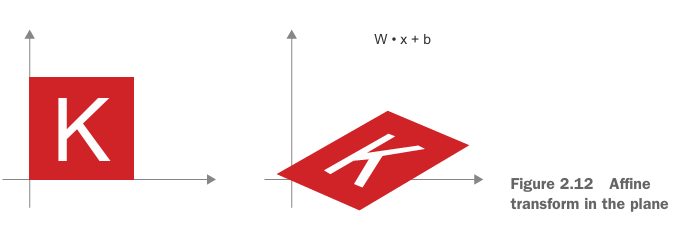

6. `Dense layer with relu activation`: An affine transform is like a simple way to do that: you can stretch it (multiply its dimensions) and then move it (add a fixed amount). If you apply one "stretch and move" action to the play-doh, and then immediately apply another "stretch and move" action, the final result is exactly the same as if you had just done one single, combined "stretch and move" action from the beginning. You don't get anything new or more complex by doing it in two steps. <code>y = W1 • x1 + W2 • x2 + W3 • x3 + W4 • x4 + b</code>
    1. Dense layers in a neural network, without activation functions, are essentially just performing these simple "stretch and move" (affine) transformations.
    2. If you stack many of these "stretch and move" layers one after another, all you end up with is still just one big "stretch and move" operation.
    3. This means a "deep" neural network made only of these simple layers would really just be a straight line model, even if it has many layers. It wouldn't be able to learn anything truly complicated like curves or complex shapes.
    4. This is why we need activation functions (like "relu"). These are like adding a special non-linear bend or twist to the play-doh after each "stretch and move" step. By adding these twists, each layer can now learn to do something truly different and complex.
    5. Thanks to activation functions, a chain of Dense layers can create incredibly intricate and non-linear transformations. This allows neural networks to learn very complex patterns and relationships in data, making them truly powerful.
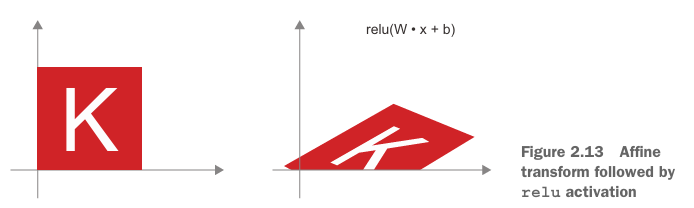

<h1 style="color: red;">The engine of neural networks: Gradient-based optimization</h1>

1. Neural networks learn by adjusting their "weights" (parameters like W and b) through a process called training. Initially, these weights are set to random values. The learning process occurs within a "training loop" that continuously refines these weights to minimize the "loss" (the discrepancy between the model's predictions and the actual target values). `loss = y_pred - y_true`
2. The training loop consists of four key steps, repeated until the loss is sufficiently low:
   1. `Draw a batch of training samples`: Select a subset[batch] of data (`x`) and their corresponding correct outputs[labels] (`y_true`).
   2. `Forward pass`: Run the model on `x` to get predictions (`y_pred`).
   3. `Compute the loss`: Calculate how much `y_pred` deviates from `y_true` [`loss = y_pred - y_true`]
   4. `Update weights`: Adjust the model's weights to reduce the loss for that batch.
3. While steps 1-3 are straightforward, step 4, updating the weights, is the core of machine learning. A naive approach of trying different values for each weight individually would be computationally impractical due to the vast number of weights.
4. Instead, modern neural networks use an efficient optimization technique called `gradient descent`. This is possible because the functions within neural networks are `differentiable,` meaning a small change in a weight results in a predictable change in the loss. Gradient descent leverages a mathematical concept called the `gradient` to determine the direction and magnitude by which all weights should be simultaneously adjusted to effectively decrease the loss. This allows for a much more efficient and practical way to train neural networks. This step is called `Backward propogation`.

### What is derivative?

1. Imagine you have a smooth, continuous hill. If you take a tiny step `epsilon_x` on this hill, your height `y` will also change by a small amount, `epsilon_y`.
2. Now, if you zoom in really close on a spot on the hill, it looks almost like a straight line. The `slope` of that tiny straight line tells you a lot. We call this slope the `derivative`.
3. The derivative tells us:
   1. `Direction`: If the slope is going uphill (positive), taking a small step forward means you go up. If it's going downhill (negative), you go down.
   2. `Steepness`: The bigger the number of the slope (positive or negative), the steeper the hill is at that point, meaning your height changes more rapidly with a small step.
4. Every smooth, continuous function has a `derivative function` that tells you the slope at any point.
5. Why is this useful? Think about trying to find the lowest point in a valley (like minimizing the "loss" in machine learning). If you know the slope (the derivative) at your current position, you know exactly which way to step to go downhill. To get to the bottom fastest, you just need to move in the opposite direction of the slope. This is the core idea behind how machine learning models adjust their internal settings to get better at their tasks.

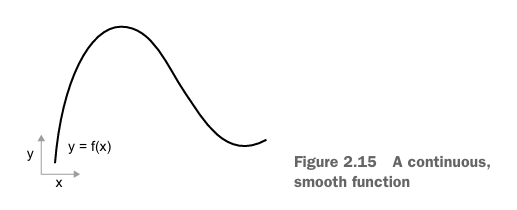

### Derivative of a tensor operation: The gradient

1. We know how a regular derivative tells you the slope of a hill if you're walking along a path (a 2D curve)? It tells you if you're going up or down, and how steep it is.
2. Now, imagine you're on a complex, bumpy landscape, like a mountain range. Your height on this landscape isn't just determined by one direction; it's affected by moving in multiple directions (like north/south and east/west). This "landscape" is what we get when we're trying to figure out how good our machine learning model is (its `loss`) based on its internal settings (`weights`).
3. `What's a Gradient?`
   1. A gradient is simply the multi-dimensional version of a derivative. Instead of telling you the slope in one direction, it tells you the "steepest uphill direction" and "how steep that direction is" on this complex landscape.
   2. In ML,
      1. We have input data (`x`), and we want our model (which has internal settings called weights, `W`) to predict something (`y_pred`).
      2. We then calculate how far off our prediction (`y_pred`) is from the correct answer (`y_true`) using a loss function. This gives us a single number, the `loss_value`. `[loss_value = y_pred - y_true]`
      3. The `loss_value` depends on the `W` (weights). So, we can think of it as a function where if you change the `W` values, the `loss_value` changes.
4. `How Gradients Help Us Learn?` `GRADIENT DESCENT`
   1. Our goal is to make the `loss_value` as small as possible. The `gradient` of the `loss_value` w.r.t `W` (we write it as `grad(loss_value, W)`) tells the `direction of the slope`. 
      1. This `gradient` is a special set of numbers (`a tensor`) that has the same shape as our weights `W`.
      2. Each number in this gradient tells us how much the `loss_value` would change if we slightly adjusted the corresponding weight in `W`, and in which direction.
      3. Crucially, the entire gradient points in the direction where the `loss_value` would increase the `most steeply`.
5. So, to reduce the loss_value (go downhill on our loss landscape), we just need to move our weights `W` in the opposite direction of the gradient. We take a small step in that opposite direction `(W_new = W_old - step * gradient)`, and this moves us closer to a lower `loss_value`. We repeat this process many times, gradually walking down the "hill" until our model's predictions are very close to the true answers.

### Chaining derivatives: The Backpropagation algorithm

##### The Problem:
1. `Neural network` takes input data, processes it through many layers (each layer doing a simple math operation like adding, multiplying, or using a "relu" function), and eventually gives a prediction. We then compare this prediction to the correct answer using a "loss function" to see how wrong it is.
2. Our goal is to adjust the internal settings (weights) of the network to reduce this "loss." We know that the "gradient" tells us which way to adjust these settings. But how do we calculate the gradient for a network with so many linked operations?

##### The Solution: Backpropagation and the Chain Rule
1. This is where `Backpropagation` comes in. It's a clever way to calculate the gradients for complex neural networks. It relies on a fundamental rule from calculus called the `Chain Rule`.
2. Think of the Chain Rule like this:
   1. If you have a chain of events, where A affects B, and B affects C, and you want to know how much A affects C, you can figure it out by knowing:
      1. How much A affects B.
      2. How much B affects C.
    2. We just multiply those influences together.
##### How it applies to Neural Networks:
1. A neural network is essentially a long chain of simple mathematical operations. For example,
   <code>
    loss_value = loss(y_true, softmax(dot(relu(dot(inputs, W1) + b1), W2) + b2))
   </code>
2. Each of these simple operations (like `dot, relu, +, softmax, loss`) has a known, easy-to-calculate derivative (its "influence").
3. `Backpropagation` uses this chain rule. It starts at the very end of the network (where the `loss_value` is calculated) and works backward through each operation, using the chain rule to figure out how much each weight in each layer contributed to the final loss. By "propagating" these influences backward, it efficiently calculates the gradient for every single weight in the entire network. This tells us exactly how to adjust each weight to make the `loss_value` smaller.

##### How Backpropagation works?
1. `Forward Pass`: You start with your input data and the their targets and train the neural network , step by step, until you get your final output `loss`.
2. `Backward Pass` (Figuring Out What Went Wrong): Now, you go backward through the neural network. For each step, you ask: "If I change weights slightly, how much will it affect the final loss?" This is like figuring out which ingredient in your dish made it too salty or not sweet enough. This "how much does it affect" is what we call a `gradient` (think of it as the "slope" or "rate of change"). Backpropagation uses a mathematical rule called the chain rule to efficiently calculate these gradients. The chain rule essentially says that to find out how much an early ingredient affected the final loss, you just multiply together all the "impacts" along the path from that ingredient to the loss.
3. `Adjusting the Weights`: Once you know how much each parameter (like w and b in our example) contributed to the loss, you can adjust them slightly to reduce the loss in the next round. This is how your machine learns and gets better over time.
By completing this `backward pass,` we efficiently compute the gradient for each `w` and `b`. This gradient is like a precise instruction: it tells us exactly which way and by how much to change each `w` and `b` to make the `loss_value` smaller. This continuous process of forward calculation and backward adjustment is how neural networks learn and become better at their tasks.